In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True, encoding='cp949')
df.head()

,삼성등락,등락,등락지표,등락분류,종가,대비,등락률,시가,고가,저가,...,거래량코스피,코스피변동,종가코스닥,시가코스닥,고가코스닥,저가코스닥,거래량코스닥,변동코스닥,S.P종가,S.P변동률
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,1,1,1,23700.0,200,0.85,23700.0,24100,23500,...,282110000.0,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88
2010-07-20,1,1,1,1,23850.0,150,0.63,23850.0,24050,23550,...,308030000.0,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80
2010-07-21,1,0,-1,-1,23600.0,-250,-1.05,24250.0,24350,23500,...,375930000.0,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74
2010-07-22,0,0,-1,-1,22600.0,-1000,-4.24,23850.0,24000,22250,...,405180000.0,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40
2010-07-23,1,1,1,1,23250.0,650,2.88,23000.0,23400,22800,...,372760000.0,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80


In [4]:
print(df.isna().sum())
print(df.shape)
print(list(df.columns))

삼성등락         0
등락           0
등락지표         0
등락분류         0
종가           0
대비           0
등락률          0
시가           0
고가           0
저가           0
거래량          0
거래대금         0
시가총액         0
상장주식수        0
환율           0
유가종가         0
유가오픈         0
유가고가         0
유가저가         0
유가변동률        0
한국은행기준금리     0
연준기준금리       0
한미기준금리차이     0
반도체수출금액지수    9
삼성종가         0
SOX종가        0
SOX변동률       0
BTC종가        0
BTC변동률       0
종가코스피        0
고가코스피        0
저가코스피        0
거래량코스피       0
코스피변동        0
종가코스닥        0
시가코스닥        0
고가코스닥        0
저가코스닥        0
거래량코스닥       0
변동코스닥        0
S.P종가        0
S.P변동률       0
dtype: int64
(2670, 42)
['삼성등락', '등락', '등락지표', '등락분류', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액', '상장주식수', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국은행기준금리', '연준기준금리', '한미기준금리차이', '반도체수출금액지수', '삼성종가', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '종가코스피', '고가코스피', '저가코스피', '거래량코스피', '코스피변동', '종가코스닥', '시가코스닥', '고가코스닥', '저가코스닥', '거래량코스닥', '변동코스닥', 'S.P종

In [5]:
df = df.dropna(axis=0)

In [7]:
features = df[['종가','시가', '고가', '저가', '거래량', '거래대금', '시가총액', '상장주식수', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국은행기준금리', '연준기준금리', '한미기준금리차이', '반도체수출금액지수', '삼성종가', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '종가코스피', '고가코스피', '저가코스피', '거래량코스피', '코스피변동', '종가코스닥', '시가코스닥', '고가코스닥', '저가코스닥', '거래량코스닥', '변동코스닥', 'S.P종가', 'S.P변동률']]
target = df['삼성등락']

In [8]:
random_seed = np.random.seed(2021)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=random_seed)

## Rogistic Regression

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

print(x_train.shape)
print(x_test.shape)

(2394, 36)
(267, 36)


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print(model.score(x_train, y_train))

0.768170426065163


In [12]:
print(model.score(x_test, y_test))

0.797752808988764


In [13]:
print(model.coef_)

[[ 0.80525789 -1.52931908 -0.10717355 -0.16442409  0.10405146 -0.05958064
   0.97514061 -0.13625919  0.02309074 -0.04186482  0.35407373 -0.93654921
   0.16482197  0.01518728  0.42502801 -0.00939291 -0.27740025  0.09696598
   0.83995069 -0.66194957 -0.0584754   0.14373106  0.02725114 -0.65981873
   0.75155725 -0.38172821 -0.09910715  2.85301316 -0.46804175  0.26865397
   0.65005568 -0.32143569 -0.233707   -0.92113926  0.44990153 -0.0044121 ]]


## Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(x_train.shape)
print(x_test.shape)

(2394, 36)
(267, 36)


In [15]:
print(lr.score(x_train, y_train))

0.3176504066320265


In [16]:
print(lr.score(x_test, y_test))

0.3381622370984785


## Random Forest&Decision Tree

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2021)
rf.fit(x_train, y_train)

RandomForestClassifier(oob_score=True, random_state=2021)

In [18]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.724
Mean accuracy score: 0.757


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=2021)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=2021)

In [20]:
y_pred_gini = clf_gini.predict(x_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7640


[Text(611.8758620689655, 880.6320000000001, 'X[27] <= 0.004\ngini = 0.5\nsamples = 2394\nvalue = [1187, 1207]'),
 Text(253.98620689655172, 684.936, 'X[27] <= -0.555\ngini = 0.377\nsamples = 1150\nvalue = [860, 290]'),
 Text(92.35862068965517, 489.24, 'X[28] <= -1.644\ngini = 0.166\nsamples = 513\nvalue = [466, 47]'),
 Text(46.179310344827584, 293.544, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(138.53793103448277, 293.544, 'X[20] <= -0.498\ngini = 0.161\nsamples = 511\nvalue = [466, 45]'),
 Text(92.35862068965517, 97.84800000000007, 'gini = 0.247\nsamples = 215\nvalue = [184, 31]'),
 Text(184.71724137931034, 97.84800000000007, 'gini = 0.09\nsamples = 296\nvalue = [282, 14]'),
 Text(415.61379310344824, 489.24, 'X[33] <= -0.429\ngini = 0.472\nsamples = 637\nvalue = [394, 243]'),
 Text(323.2551724137931, 293.544, 'X[34] <= -1.172\ngini = 0.481\nsamples = 166\nvalue = [67, 99]'),
 Text(277.07586206896553, 97.84800000000007, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]'),
 Text(369.43

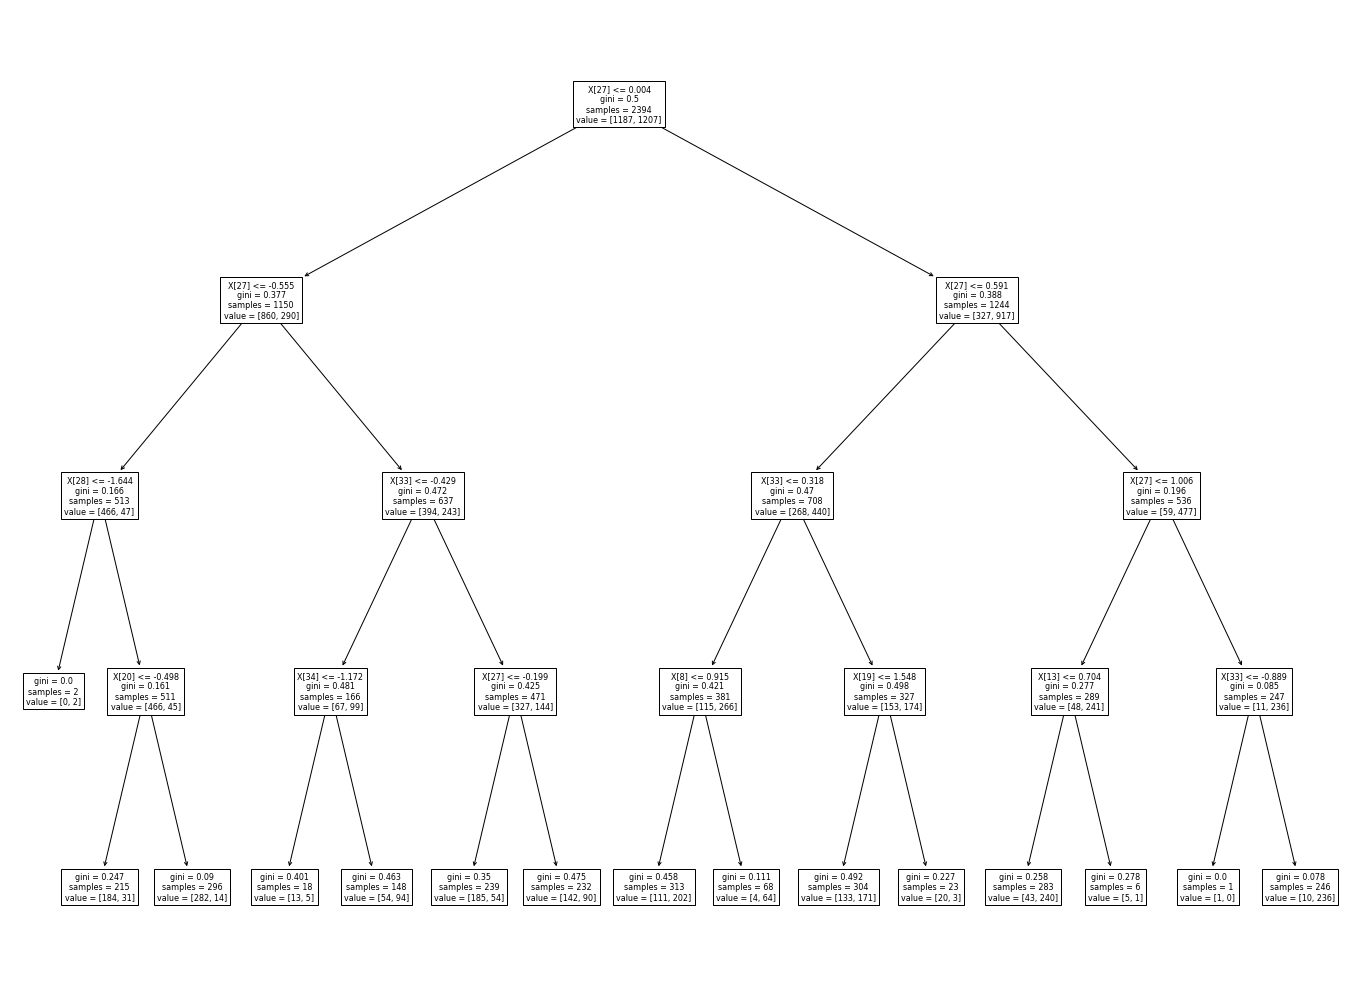

In [21]:
plt.figure(figsize=(24,18))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 